🫀 Heart Disease Prediction Using Machine Learning:

In this project, we work with a real-world medical dataset from the UCI Machine Learning Repository (Cleveland Heart Disease Dataset) and guide you through the complete Machine Learning pipeline — from data exploration to building classification models and evaluating their performance.

🔍 Introduction: Heart disease is one of the leading causes of death worldwide. Early detection plays a crucial role in reducing mortality and improving patient outcomes. In this project, we use patient medical data to build machine learning models that can predict whether a person is likely to have heart disease or not.

🎯 Goal: The main goal of this project is to:

Analyze patient health data,
Apply different classification algorithms,
Compare their performance,
Identify the model that gives the best prediction accuracy for heart disease.

🤖 Models Used:
We trained and compared the following machine learning models:

1. Logistic Regression

2. Support Vector Machine (SVM)

3. Random Forest

4. XGBoost

📈 How We Measured Performance: To evaluate how well each model works, we used:

1. Accuracy – How many predictions were correct

2. Precision – How many predicted heart disease cases were actually correct

3. Recall – How many actual heart disease cases were detected

4. F1 Score – Balance between precision and recall

5. Confusion Matrix – Shows correct and incorrect predictions

✅ Result:After testing all the models, we identified the algorithm that performs best for predicting heart disease. This project demonstrates how machine learning can support doctors in making faster and more accurate medical decisions, leading to improved patient care.

## Import the packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [11]:
#importing a csv file
df=pd.read_csv("C:/Users/vasav/OneDrive/Desktop/uci_heart_disease_cleveland (2).csv")
#View top 5 rows of a dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [12]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [13]:
#Gaining Insight into Dataset Structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
l=LabelEncoder()
df['thal']=l.fit_transform(df['thal'])
df['ca']=l.fit_transform(df['ca'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [20]:
#Descriptive Statistics of the Dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,0.851485,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,4.000000


In [22]:
#Summarizing Null Values in the Dataset 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Computing the Correlation Matrix 

In [25]:
correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.300361  0.116008  0.207846  0.095260  0.083958  0.145757   
thal      0.116196  0.354882  0.263484  0.120810  0.015502  0.07

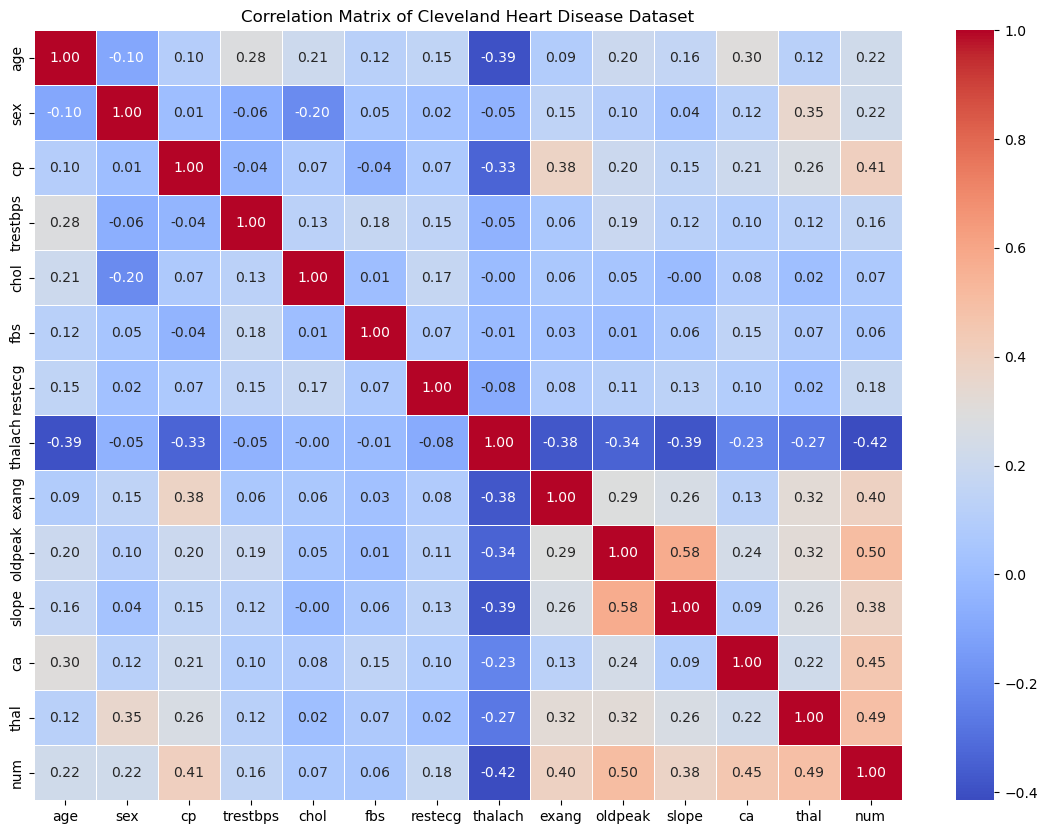

In [27]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Cleveland Heart Disease Dataset")
plt.show()

🔍 Inference from the Correlation Heatmap (Simple Explanation)

The correlation heatmap shows how different medical features are related to heart disease in the Cleveland dataset.

✅ Features strongly linked to heart disease

The following features have a strong positive relationship with heart disease. This means higher values increase the chance of heart disease:

1. cp (chest pain type)

2. exang (exercise-induced angina)

3. oldpeak (ST depression)

4. ca (number of major blood vessels)

5. thal (thalassemia)

These features are important indicators and help models predict heart disease accurately.

❌ Feature with negative relationship

1. thalach (maximum heart rate achieved)

A higher heart rate during exercise usually means lower risk of heart disease.

🔗 Related features

Some features are related to each other:

1. trestbps and chol

2. exang and oldpeak

This is common in medical data and shows that some health factors are connected.

📌 Conclusion

Chest pain, exercise-related symptoms, heart rate, and blood vessel condition play a major role in predicting heart disease. These features are very useful for machine learning models, but selecting the right features can further improve accuracy.

In [30]:
# 0 → No Disease
# 1–4 → Disease Present
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

## splitting the data in to independent and dependent variables in terms of x and y

In [33]:
X = df.drop('num', axis=1)
y = df['num']

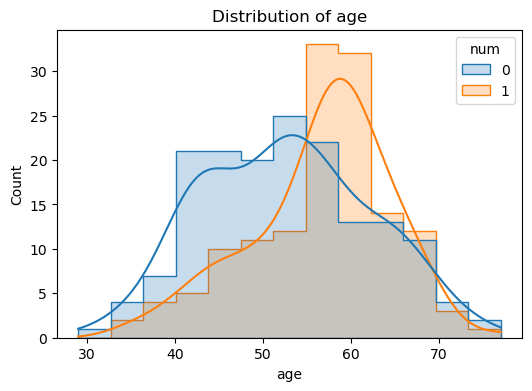

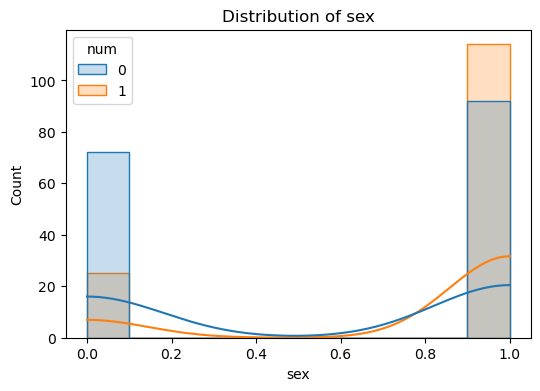

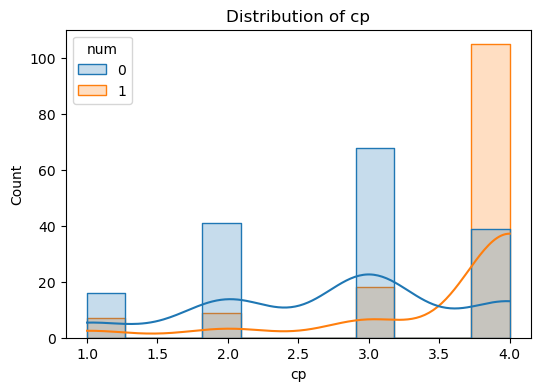

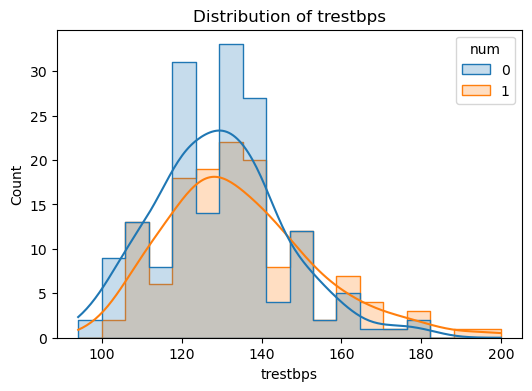

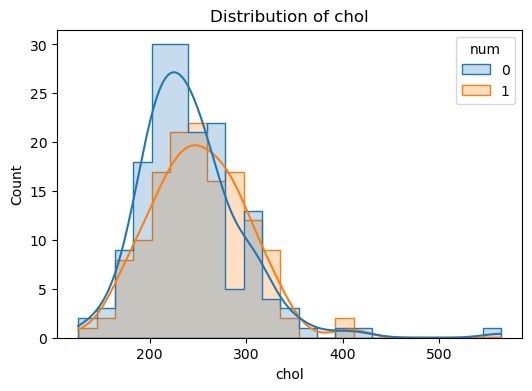

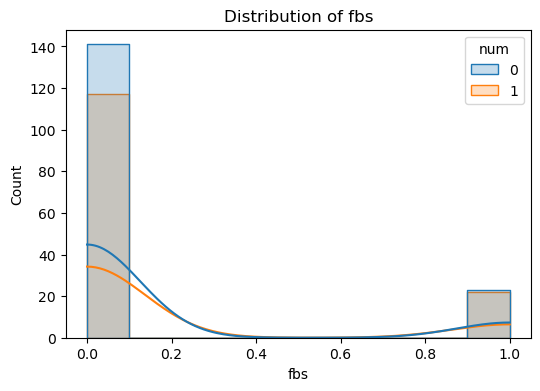

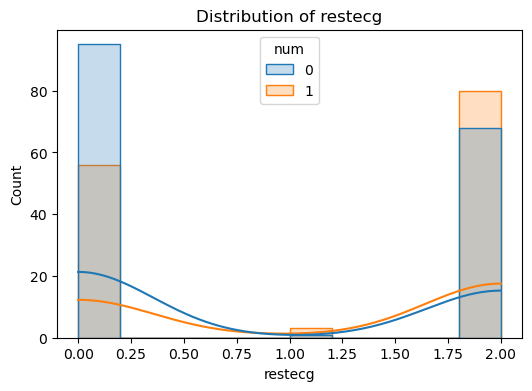

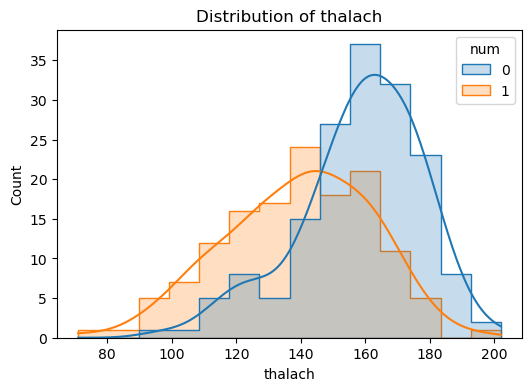

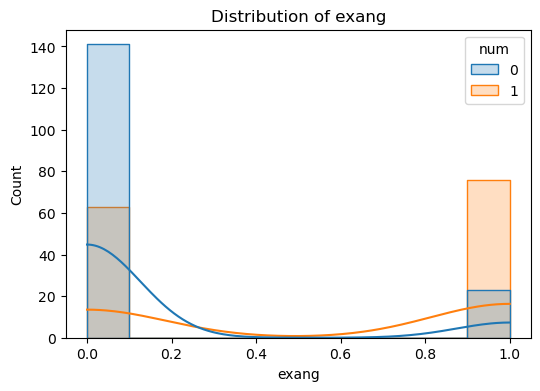

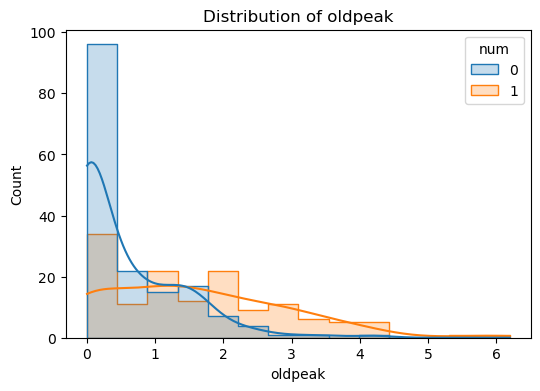

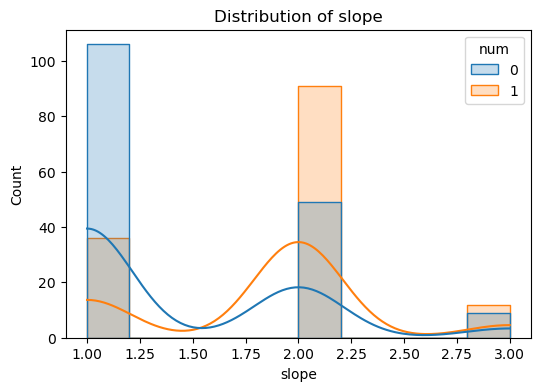

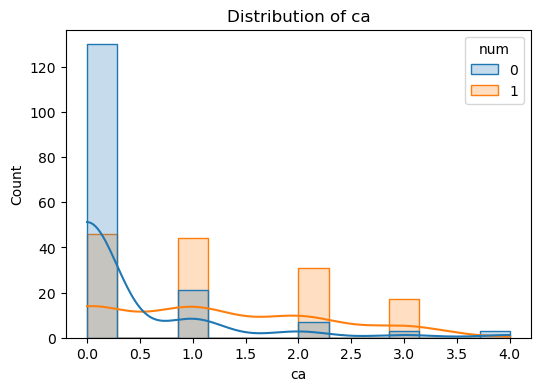

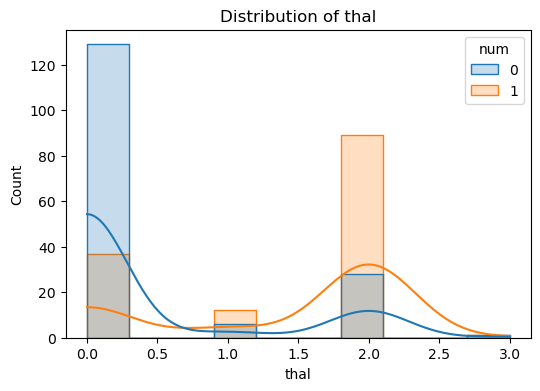

In [37]:
for column in df.columns[:-1]:   
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=df,
        x=column,
        hue='num',
        kde=True,
        element='step'
    ) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

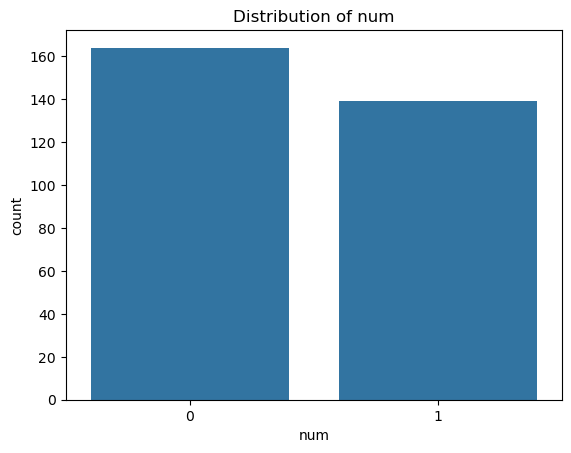

In [39]:
sns.countplot(x='num',data=df)
plt.title("Distribution of num")
plt.show()

The target variable num has two classes: 0 (no heart disease) and 1 (heart disease).
The count of class 0 is slightly higher than class 1, but both are nearly balanced.
This balanced distribution makes the dataset suitable for classification models.

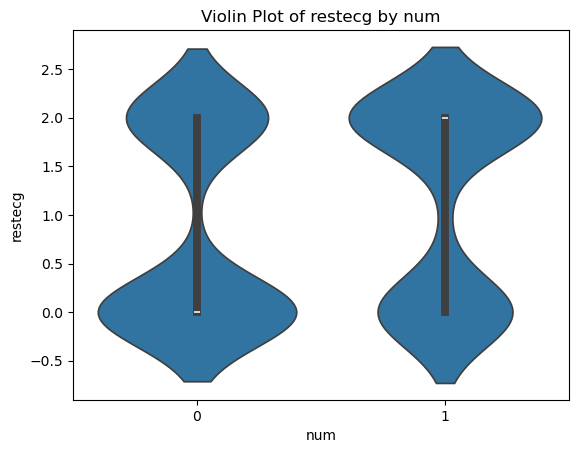

In [42]:
sns.violinplot(x='num', y='restecg', data=df)
plt.title("Violin Plot of restecg by num")
plt.show()

The violin plot shows the distribution of resting ECG (restecg) values for patients with and without heart disease.
Both classes (0 and 1) have similar distributions, mainly concentrated around values 0 and 2.
This suggests that restecg alone does not strongly differentiate heart disease presence.

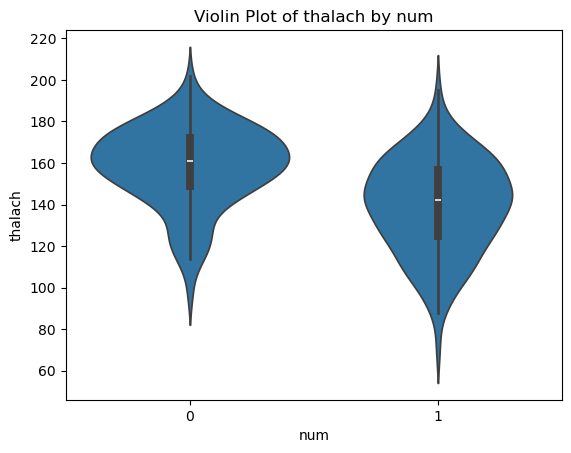

In [45]:
sns.violinplot(x='num', y='thalach', data=df)
plt.title("Violin Plot of thalach by num")
plt.show()

The violin plot shows the distribution of maximum heart rate (thalach) for patients with and without heart disease.
Patients without heart disease (num = 0) generally have higher thalach values.
Lower thalach values are more common in patients with heart disease (num = 1).

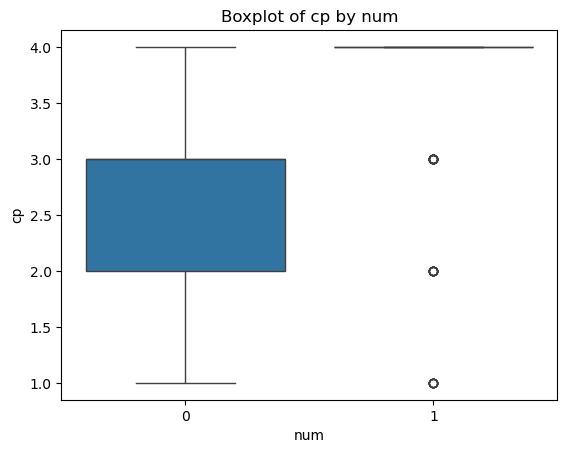

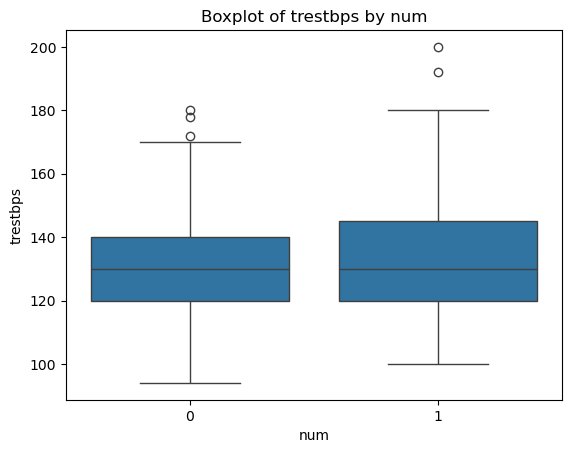

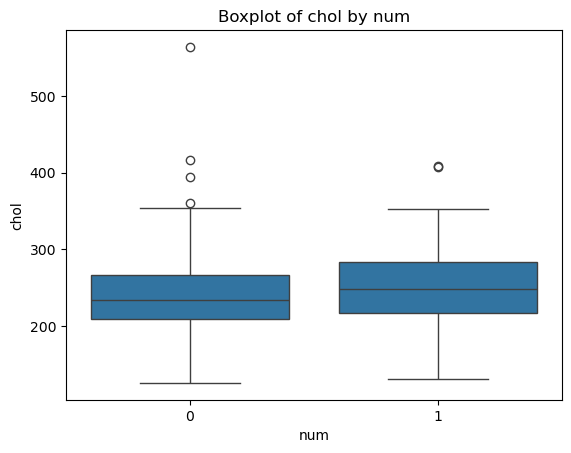

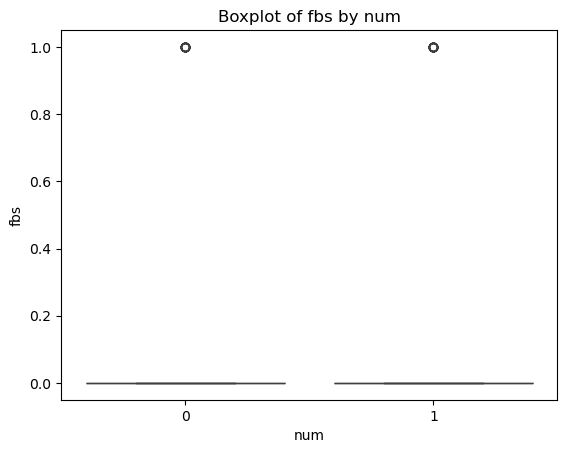

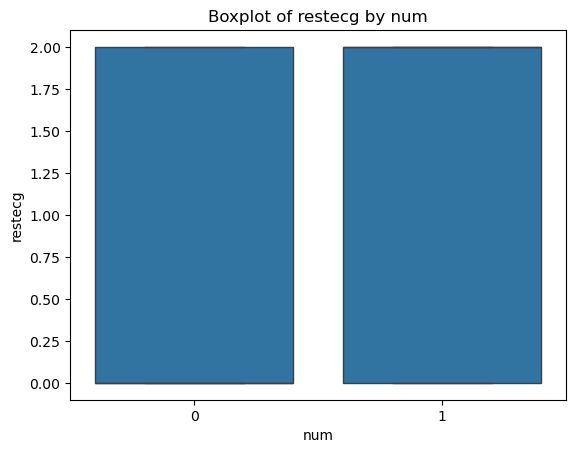

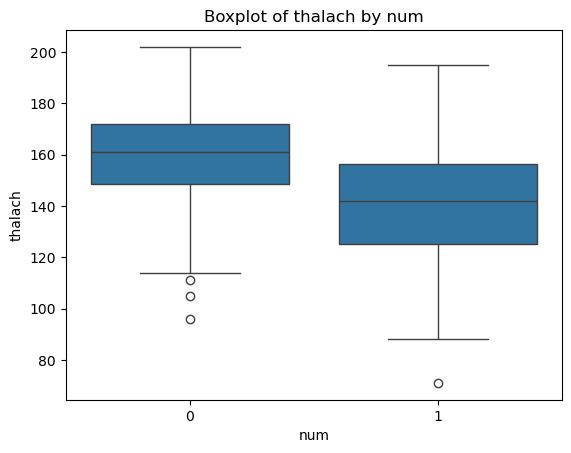

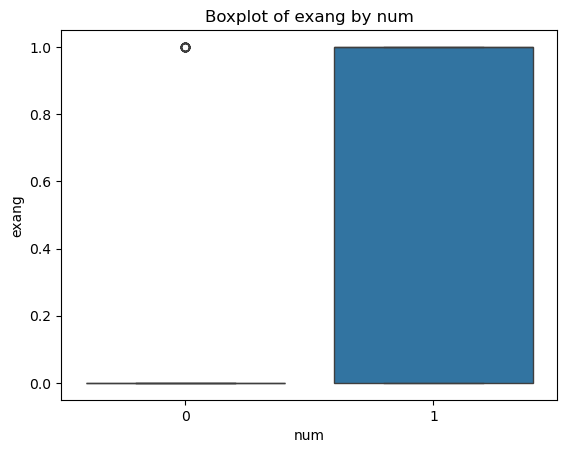

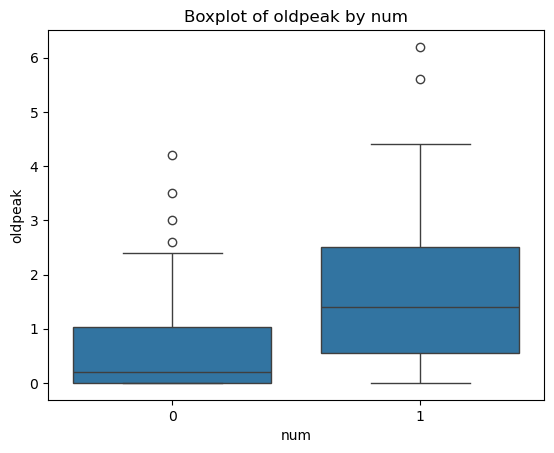

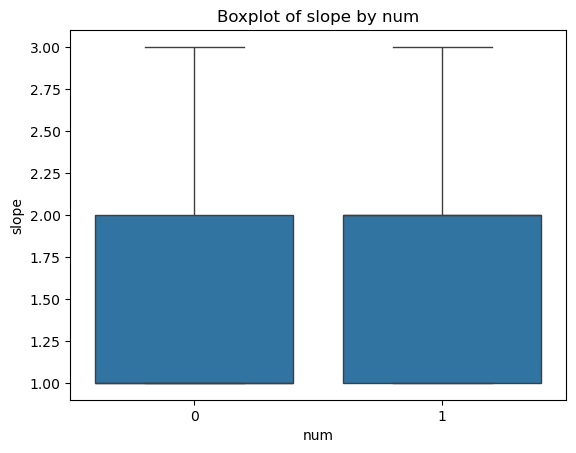

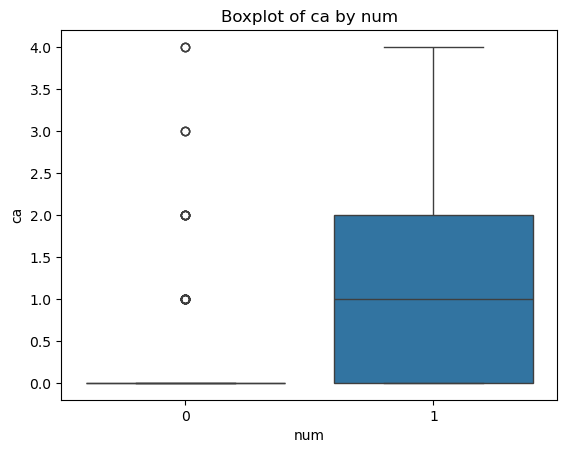

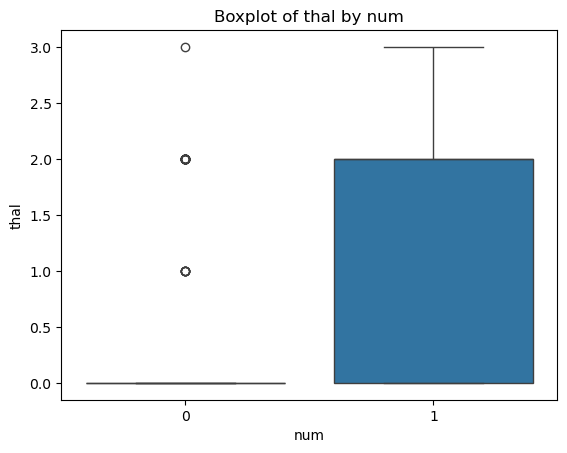

In [48]:
for column in df.columns[2:-1]:
    sns.boxplot(x='num',y=column,data=df)
    plt.title(f'Boxplot of {column} by num')
    plt.show()

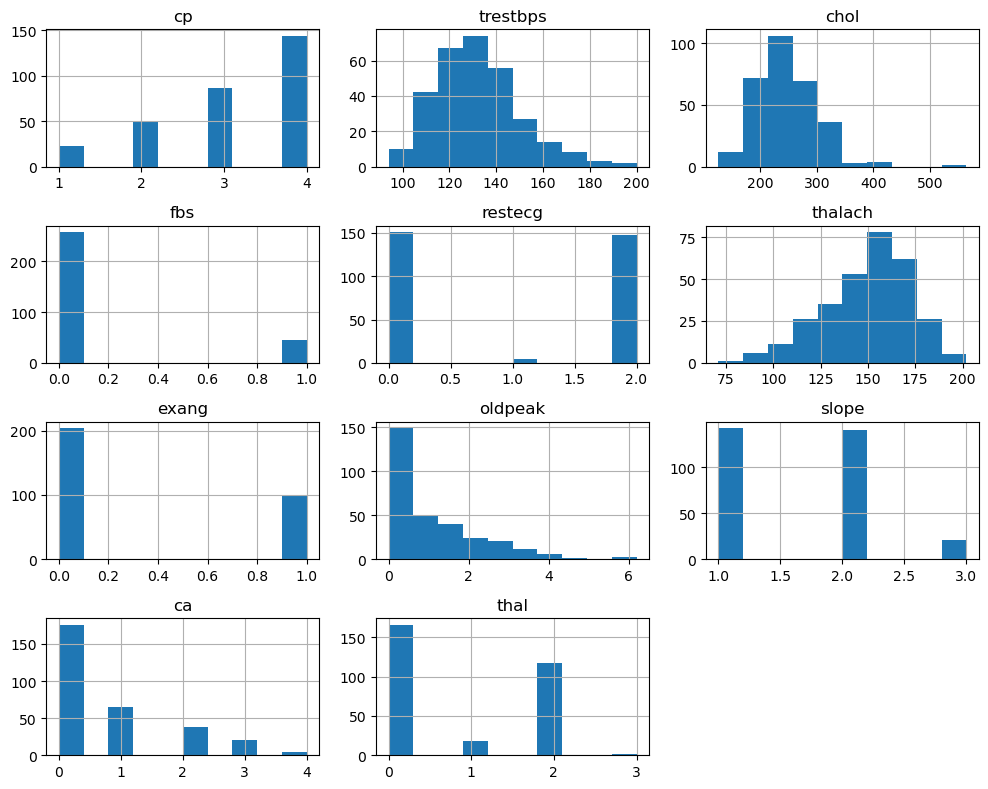

In [50]:
# Histograms for numerical features
df.iloc[:, 2:-1].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [54]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Logistic Regression

In [57]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, lr_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, lr_pred))



Logistic Regression Accuracy: 0.8360655737704918

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:

[[25  4]
 [ 6 26]]


## SVM


In [60]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, svm_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, svm_pred))



SVM Accuracy: 0.8852459016393442

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:

[[27  2]
 [ 5 27]]


## Random Forest

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))



Random Forest Accuracy: 0.9016393442622951

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:

[[27  2]
 [ 4 28]]


## XGBoost

In [66]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train.astype(int))
xgb_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.8852459016393442


In [68]:
print("\nClassification Report:\n")
print(classification_report(y_test, xgb_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, xgb_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:

[[26  3]
 [ 4 28]]


C:\Users\vasav\AppData\Local\Temp\ipykernel_32160\54721608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', legend=False)


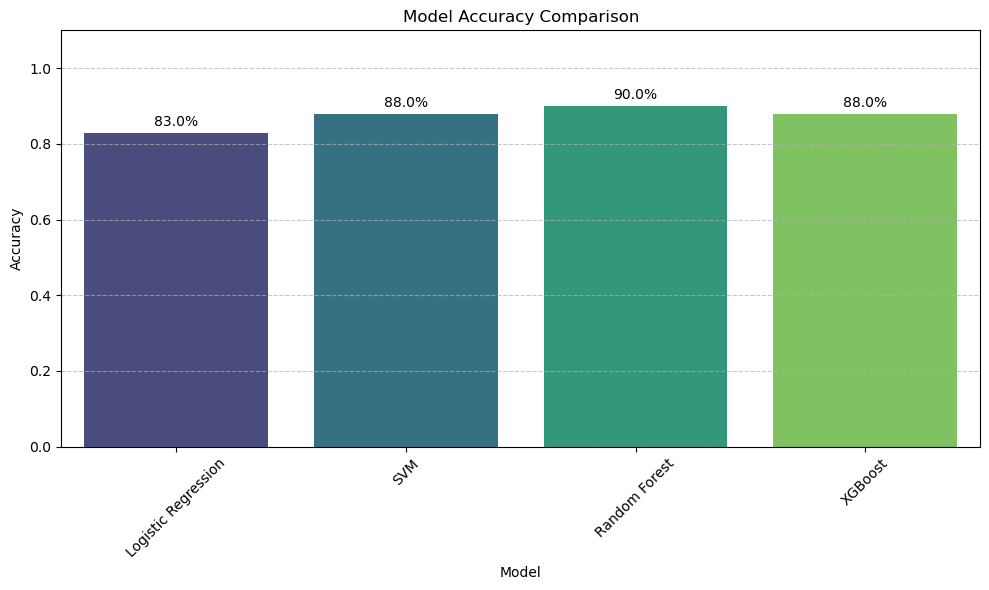

In [70]:
d = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.83, 0.88, 0.90, 0.88]
}

df = pd.DataFrame(d)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', legend=False)

# Add percentage labels on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart compares the accuracy of different machine learning models.
Logistic Regression achieves an accuracy of about 83%.
SVM and XGBoost both show similar performance with around 88% accuracy.
Random Forest gives the highest accuracy at approximately 90%.
Overall, Random Forest performs best among the compared models.